In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

# 1. 데이터셋 불러오기 

Iris Data = 아이리스(붓꽃) 데이터에 대한 데이터이다. 꽃잎의 각 부분의 너비와 길이등을 측정한 데이터이며 150개의 레코드로 구성되어 있다. 아이리스 꽃은 아래의 그림과 같다.
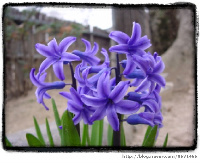

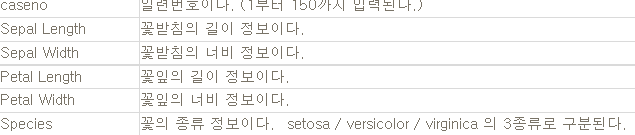


Reference : https://ai-times.tistory.com/418

In [3]:
#Load dataset
iris = datasets.load_iris()

In [5]:
# Feauture 이름 불러오기
print("Features: ", iris.feature_names)
# 꽃 종류 불러오기 
print("Labels: ", iris.target_names)

Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Labels:  ['setosa' 'versicolor' 'virginica']


In [6]:
# Shape
iris.data.shape

(150, 4)

In [7]:
# print the cancer labels ('setosa' 'versicolor' 'virginica')
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [8]:
# 데이터 프레임 만들기 
df_iris = pd.DataFrame(iris['data'], columns = iris.feature_names)
df_iris['label'] = iris.target
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
# 개별 Label에 대한 개수 확인
df_iris['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [10]:
# view summary of dataset
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


# Summary of numerical variables

1. 데이터 세트에는 5개의 numerical 변수존재
2. 4개의 변수는 연속형 변수이며 1개의 변수가 이산형 변수
3. 이산형 변수는 Label
4. 데이터 셋에 결측 값은 없음

# 2. numerical 변수의 이상치 확인

In [11]:
round(df_iris.describe(),2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
count,150.00,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20,1.00
std,0.83,0.44,1.77,0.76,0.82
min,4.30,2.00,1.00,0.10,0.00
25%,5.10,2.80,1.60,0.30,0.00
50%,5.80,3.00,4.35,1.30,1.00
75%,6.40,3.30,5.10,1.80,2.00
max,7.90,4.40,6.90,2.50,2.00


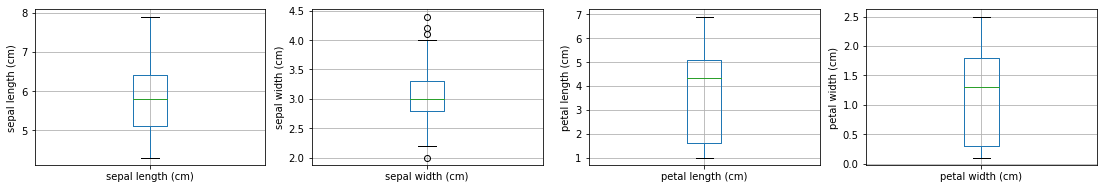

In [13]:
# Label을 통합하여 Box Plot 그리기 

plt.figure(figsize=(24,20))
plt.title('Total_Label_BoxPlot')

for i in range(len(df_iris.columns[:-1])):
    plt.subplot(6,5,(i+1))
    fig = df_iris.boxplot(column=df_iris.columns[i])
    fig.set_title('')
    fig.set_ylabel(f'{df_iris.columns[i]}')

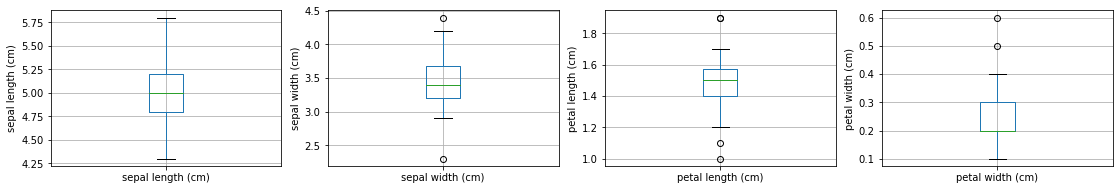

In [16]:
# setosa Label에 대한 Box Plot 그리기  

plt.figure(figsize=(24,20))
plt.title('setosa_Label_BoxPlot')
df_iris_setosa = df_iris.loc[df_iris.loc[:,'label']==0]
df_iris_setosa.reset_index(inplace=True,drop=True)


for i in range(len(df_iris_setosa.columns[:-1])):
    plt.subplot(6,5,(i+1))
    fig = df_iris_setosa.boxplot(column=df_iris_setosa.columns[i])
    fig.set_title('')
    fig.set_ylabel(f'{df_iris_setosa.columns[i]}')

In [ ]:
# setosa Label에 대한 Box Plot 그리기  

plt.figure(figsize=(24,20))
plt.title('setosa_Label_BoxPlot')
df_iris_setosa = df_iris.loc[df_iris.loc[:,'label']==0]
df_iris_setosa.reset_index(inplace=True,drop=True)


for i in range(len(df_iris_setosa.columns[:-1])):
    plt.subplot(6,5,(i+1))
    fig = df_iris_setosa.boxplot(column=df_iris_setosa.columns[i])
    fig.set_title('')
    fig.set_ylabel(f'{df_iris_setosa.columns[i]}')

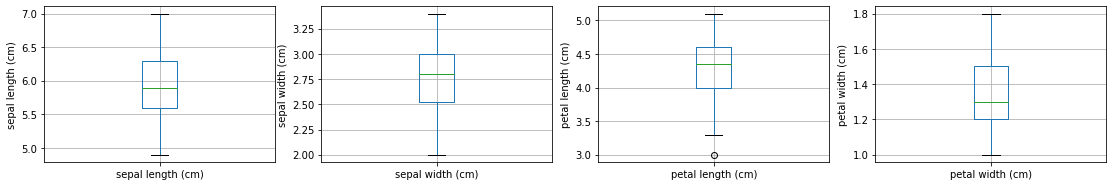

In [17]:
# versicolor Label에 대한 Box Plot 그리기  

plt.figure(figsize=(24,20))
plt.title('versicolor_Label_BoxPlot')
df_iris_versicolor = df_iris.loc[df_iris.loc[:,'label']==1]
df_iris_versicolor.reset_index(inplace=True,drop=True)


for i in range(len(df_iris_versicolor.columns[:-1])):
    plt.subplot(6,5,(i+1))
    fig = df_iris_versicolor.boxplot(column=df_iris_versicolor.columns[i])
    fig.set_title('')
    fig.set_ylabel(f'{df_iris_versicolor.columns[i]}')

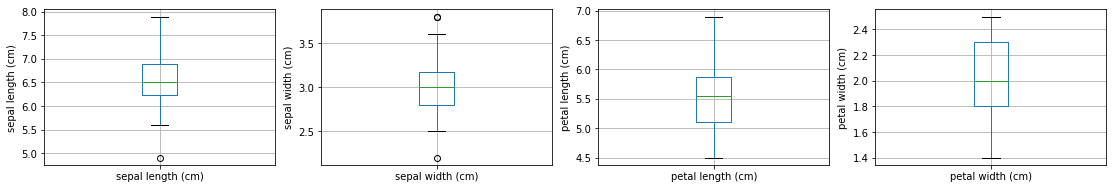

In [18]:
# virginica Label에 대한 Box Plot 그리기  

plt.figure(figsize=(24,20))
plt.title('virginica_Label_BoxPlot')
df_iris_virginica = df_iris.loc[df_iris.loc[:,'label']==2]
df_iris_virginica.reset_index(inplace=True,drop=True)


for i in range(len(df_iris_virginica.columns[:-1])):
    plt.subplot(6,5,(i+1))
    fig = df_iris_virginica.boxplot(column=df_iris_virginica.columns[i])
    fig.set_title('')
    fig.set_ylabel(f'{df_iris_virginica.columns[i]}')

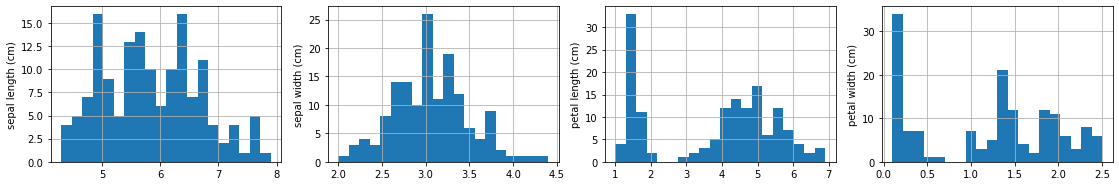

In [19]:
# Label을 통합하여 hist 그리기 

plt.figure(figsize=(24,20))
plt.title('Total_Label_hist')

for i in range(len(df_iris.columns[:-1])):
    plt.subplot(6,5,(i+1))
    fig = df_iris[df_iris.columns[i]].hist(bins=20)
    fig.set_title('')
    fig.set_ylabel(f'{df_iris.columns[i]}')

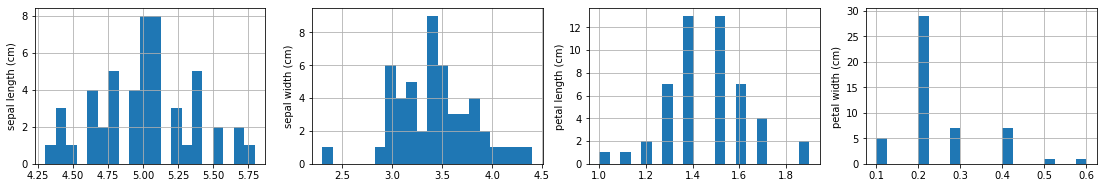

In [20]:
# Label을 통합하여 hist 그리기 

plt.figure(figsize=(24,20))
plt.title('setosa_Label_hist')

for i in range(len(df_iris_setosa.columns[:-1])):
    plt.subplot(6,5,(i+1))
    fig = df_iris_setosa[df_iris_setosa.columns[i]].hist(bins=20)
    fig.set_title('')
    fig.set_ylabel(f'{df_iris_setosa.columns[i]}')

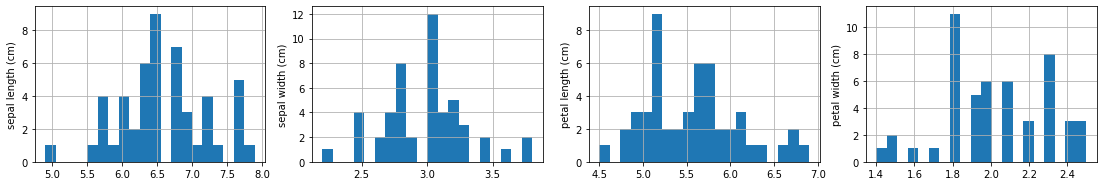

In [21]:
# Label을 통합하여 hist 그리기 

plt.figure(figsize=(24,20))
plt.title('virginica_Label_hist')

for i in range(len(df_iris_virginica.columns[:-1])):
    plt.subplot(6,5,(i+1))
    fig = df_iris_virginica[df_iris_virginica.columns[i]].hist(bins=20)
    fig.set_title('')
    fig.set_ylabel(f'{df_iris_virginica.columns[i]}')

# Result
BOX plot을 통해 소수의 이상치가 있음을 확인하였고 histogram을 통해 분포가 유방암 데이터에 비해 상대적으로 덜 치우침을 확인하였디/  


# 3. 특징 변수와 Target 변수 설정

In [22]:
X = df_iris.drop(['label'], axis=1)
y = df_iris['label']

# 4. Train과 Test 데이터 분리

In [24]:
#from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [25]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((120, 4), (30, 4))

# 5. 스케일링

In [27]:
cols = X_train.columns

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [30]:
X_train.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,120.000000,1.200000e+02,1.200000e+02,1.200000e+02
mean,0.000000,-7.498631e-16,4.255855e-16,2.572017e-16
std,1.004193,1.004193e+00,1.004193e+00,1.004193e+00
min,-1.866642,-2.449024e+00,-1.527937e+00,-1.465668e+00
25%,-0.922005,-5.890057e-01,-1.246635e+00,-1.206640e+00
50%,-0.095448,-1.240012e-01,3.005240e-01,8.850133e-02
75%,0.731110,5.735056e-01,7.787368e-01,8.655861e-01
max,2.384225,3.131030e+00,1.735163e+00,1.642671e+00


# 6. Run SVM with default hyperparameters 
1. C=1 
2. kernel = rbf
3. degree = 3

In [32]:
# 
svc=SVC() 
# fit classifier to training set
svc.fit(X_train,y_train)
# make predictions on test set
y_pred=svc.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 1.0000


# 7. Run SVM with rbf kernel and C=50.0

In [33]:
# instantiate classifier with rbf kernel and C=50
svc=SVC(C=50.0) 

# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=50.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=50.0 : 1.0000


# 8. Run SVM with rbf kernel and C=100.0

In [35]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0) 

# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 1.0000


# Result

데이터 셋이 비교적 간단하여 Soft마진, Hard마진 둘 다 분류 성능이 100프로가 산출됨.  

# 9. Run SVM with linear kernel

In [37]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 

# fit classifier to training set
linear_svc.fit(X_train,y_train)

# make predictions on test set
y_pred_test=linear_svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 1.0000


# 10. Run SVM with linear kernel and c=50

In [38]:
# Run SVM with linear kernel and C=50.0

# instantiate classifier with linear kernel and C=50.0
linear_svc100=SVC(kernel='linear', C=50.0) 

# fit classifier to training set
linear_svc100.fit(X_train, y_train)

# make predictions on test set
y_pred=linear_svc100.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with linear kernel and C=50.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=50.0 : 1.0000


# 11. Run SVM with linear kernel and c=100

In [39]:
# Run SVM with linear kernel and C=100.0

# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 

# fit classifier to training set
linear_svc100.fit(X_train, y_train)

# make predictions on test set
y_pred=linear_svc100.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 1.0000


# Result

rbf 커널과 동일한 결과가 산출됨.

# 12. Overfitting과 Underfitting Check

In [41]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 0.9583
Test set score: 1.0000


# 13. Run SVM with polynomial kernel 

In [42]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0) 

# fit classifier to training set
poly_svc.fit(X_train,y_train)

# make predictions on test set
y_pred=poly_svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9000


In [43]:
# instantiate classifier with polynomial kernel and C=50.0
poly_svc100=SVC(kernel='poly', C=50.0) 

# fit classifier to training set
poly_svc100.fit(X_train, y_train)

# make predictions on test set
y_pred=poly_svc100.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=50 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=50 : 1.0000


In [44]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc100=SVC(kernel='poly', C=100.0) 

# fit classifier to training set
poly_svc100.fit(X_train, y_train)

# make predictions on test set
y_pred=poly_svc100.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=100 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=100 : 1.0000


# Result

polynomial Kernel을 사용하였을 경우 Hard Margin의 경우 상대적으로 낮은 분류 성능을 보임

#  14. Run SVM with sigmoid kernel 

In [46]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 


# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.8667


In [47]:
# instantiate classifier with sigmoid kernel and C=50.0
sigmoid_svc=SVC(kernel='sigmoid', C=50.0) 


# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=50.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=50.0 : 0.8667


In [48]:
# instantiate classifier with sigmoid kernel and C=100.0
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0) 


# fit classifier to training set
sigmoid_svc100.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=100.0 : 0.9000


# Result
유방암 데이터셋과 마찬가지로 Sigmoid Kernel이 상대적으로 가장 낮은 성능을 보임.
해당 Kernel은 조금 더 복잡한 데이터 셋에서 잘 작동하는 것으로 예상함.

# 15. Check Confusion matrix 
-> y_pred_test = Linear 커널 C=1.0인 SVM로 학습한 모델로 추론된 예측 값

In [51]:
# Print the Confusion Matrix and slice it into four pieces
#  y_pred_test = Linear 커널 C=1.0인 SVM로 학습한 모델로 추론된 예측 값

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

True Positives(TP) =  11

True Negatives(TN) =  13

False Positives(FP) =  0

False Negatives(FN) =  0


# 16. Check accuracy, precision, recall and f1 Score
-> y_pred_test = Linear 커널 C=1.0인 SVM로 학습한 모델로 추론된 예측 값

In [52]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# 17. Stratified k-fold Cross Validation with shuffle split

In [55]:
kfold=KFold(n_splits=5, shuffle=True, random_state=0)
linear_svc=SVC(kernel='linear')
linear_scores = cross_val_score(linear_svc, X, y, cv=kfold)

In [56]:
# print cross-validation scores with linear kernel
print('Stratified cross-validation scores with linear kernel:\n\n{}'.format(linear_scores))

Stratified cross-validation scores with linear kernel:

[1.         0.96666667 1.         1.         0.93333333]


In [57]:
print('Average stratified cross-validation score with linear kernel:{:.4f}'.format(linear_scores.mean()))

Average stratified cross-validation score with linear kernel:0.9800


In [58]:
# Stratified k-Fold Cross Validation with shuffle split with rbf kernel
rbf_svc=SVC(kernel='rbf')
rbf_scores = cross_val_score(rbf_svc, X, y, cv=kfold)
print('Stratified Cross-validation scores with rbf kernel:\n\n{}'.format(rbf_scores))

Stratified Cross-validation scores with rbf kernel:

[1.         0.8        1.         0.96666667 0.93333333]


In [59]:
# print average cross-validation score with rbf kernel
print('Average stratified cross-validation score with rbf kernel:{:.4f}'.format(rbf_scores.mean()))

Average stratified cross-validation score with rbf kernel:0.9400


# 18. Hyperparameter Optimization using GridSearch CV

In [60]:

# instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=auto
svc=SVC() 

# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
              ]

grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [61]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.9500


Parameters that give the best results : 

 {'C': 100, 'kernel': 'linear'}


Estimator that was chosen by the search : 

 SVC(C=100, kernel='linear')


In [62]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 1.0000


# 20. GridSearch로 찾은 Best Parmeter Plotting

In [63]:
X = iris.data[:, :2] # 2개의 Feature만 사용
y = iris.target

In [66]:
# GrdiSearch로 찾은 최적의 HyperParmeter
C = 100.0 
kernel = 'linear'
svc = SVC(kernel=kernel, C=C).fit(X, y)

In [67]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

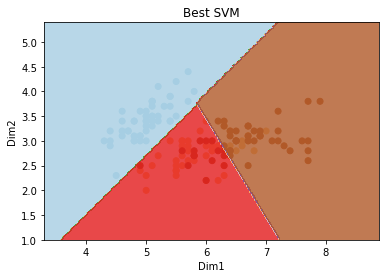

In [68]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.xlabel('Dim1')
plt.ylabel('Dim2')
plt.xlim(xx.min(), xx.max())
plt.title('Best SVM')
plt.show()